In [79]:
# https://dev.to/oscarleo/how-to-create-data-maps-of-the-united-states-with-matplotlib-p9i

import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib.patches import Patch, Circle

edge_color = "#30011E"
background_color = "#fafafa"

sns.set_style({
    "font.family": "serif",
    "figure.facecolor": background_color,
    "axes.facecolor": background_color,
})


In [81]:
def translate_geometries(df, x, y, scale, rotate):
    df.loc[:, "geometry"] = df.geometry.translate(yoff=y, xoff=x)
    center = df.dissolve().centroid.iloc[0]
    df.loc[:, "geometry"] = df.geometry.scale(xfact=scale, yfact=scale, origin=center)
    df.loc[:, "geometry"] = df.geometry.rotate(rotate, origin=center)
    return df

def adjust_maps(df):
    df_main_land = df[~df.STATEFP.isin(["02", "15"])]
    df_alaska = df[df.STATEFP == "02"]
    df_hawaii = df[df.STATEFP == "15"]

    df_alaska = translate_geometries(df_alaska, 1300000, -4900000, 0.5, 32)
    df_hawaii = translate_geometries(df_hawaii, 5400000, -1500000, 1, 24)

    return pd.concat([df_main_land, df_alaska, df_hawaii])



In [83]:
counties = gpd.read_file("./data/cb_2018_us_county_500k/")
counties = counties[~counties.STATEFP.isin(["72", "69", "60", "66", "78"])]
counties = counties.set_index("GEOID")

states = gpd.read_file("./data/cb_2018_us_state_500k/")
states = states[~states.STATEFP.isin(["72", "69", "60", "66", "78"])]

counties = counties.to_crs("ESRI:102003")
states = states.to_crs("ESRI:102003")

counties = adjust_maps(counties)
states = adjust_maps(states)


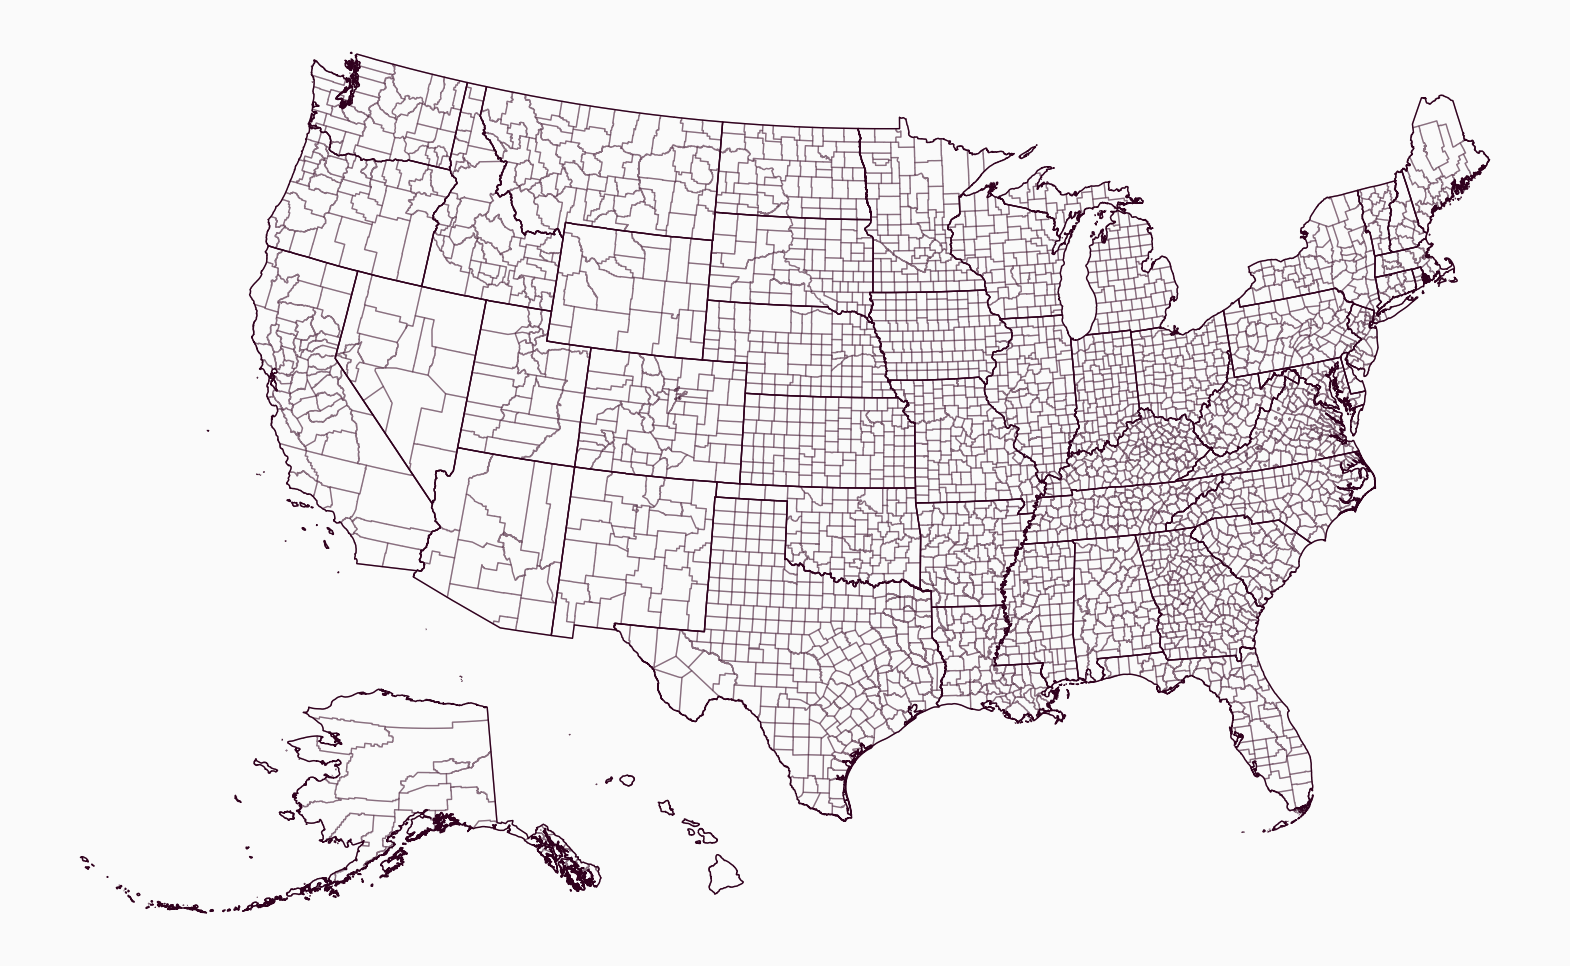

In [13]:
ax = counties.plot(edgecolor=edge_color + "55", color="None", figsize=(20, 20))
states.plot(ax=ax, edgecolor=edge_color, color="None", linewidth=1)



plt.axis("off")
plt.show()

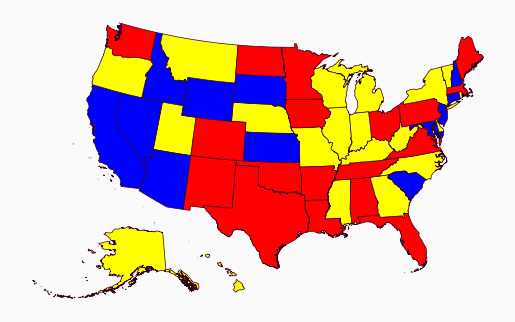

In [85]:
# if the output is a numpy array (51 by 3 ; each row is a state in alphabetical order, each column is respectively Democrat, Republicans, Others)

def create_state_colors(results):
    colors = ["blue", "red", "yellow"]
    state_colors = np.array([colors[np.argmax(results[i])] for i in range(len(results))])
    return state_colors

ax = states.plot(edgecolor=edge_color, color=create_state_colors(results), linewidth=0.5)

plt.axis("off")
plt.show()

In [77]:
# testing

results

array([[0.87085936, 0.60337509, 0.70902505],
       [0.51825303, 0.31351381, 0.02975191],
       [0.12842549, 0.79765802, 0.45240267],
       [0.90751753, 0.07407085, 0.77493477],
       [0.82578484, 0.73350894, 0.15697024],
       [0.75674609, 0.65559706, 0.16351643],
       [0.65010373, 0.46034198, 0.33824002],
       [0.33275537, 0.27092897, 0.21581631],
       [0.6612066 , 0.35865657, 0.29321249],
       [0.67674786, 0.19560113, 0.89929511],
       [0.55162867, 0.59767392, 0.56566067],
       [0.60234652, 0.67204813, 0.17628439],
       [0.50324366, 0.24809514, 0.58029978],
       [0.90899967, 0.64002294, 0.25945027],
       [0.3693853 , 0.82418061, 0.86116257],
       [0.06257021, 0.24326642, 0.45413266],
       [0.51051613, 0.98604118, 0.78403922],
       [0.14977939, 0.44714148, 0.30360681],
       [0.43515732, 0.79279369, 0.9231419 ],
       [0.85588409, 0.53680561, 0.14689019],
       [0.64192068, 0.22327266, 0.52099702],
       [0.22977943, 0.58305279, 0.66276389],
       [0.